In [2]:

import sys


sys.path.append('../../') #server per fare l'import di file in un'altra directory sullo stesso "livello"
from src.neuralNetwork.NeuralNetwork import Layer, NeuralNetwork
from src.neuralNetwork.function import IdentityFunction, SoftplusFunction
from matplotlib import pyplot as plt
from src.load_ds import load_matrix
from src.neuralNetwork.error import MeanAbsoluteError, MeanAbsolutePercentageError
from src.training.biasVariance_crossValidation import biasVariance_crossValidation, plot_training, plot_validation, \
    plot_mean_and_std_validation
import numpy as np

In [3]:
target_inputs, target_outputs = load_matrix('../../datasets/CUP/model_selection')

In [4]:
layer1 = Layer(num_neurons = 4, num_inputs = 9, activation_function = SoftplusFunction())
layer2 = Layer(num_neurons = 2, num_inputs = 4, activation_function = IdentityFunction())
neuralNetwork1 = NeuralNetwork([layer1, layer2], error=MeanAbsolutePercentageError())

In [5]:
learning_rate = 0.00001
regularization_term = 0.01
momentum_term = 0.5
epochs = 100

training_error_list, validation_error_list = biasVariance_crossValidation(
    target_inputs = target_inputs, target_outputs = target_outputs, k = 5,
    model = neuralNetwork1, learning_rate=learning_rate, momentum_term=momentum_term,
    regularization_term=regularization_term, epochs=epochs)

Fold  0
Epoch 0/100: Training error: 0.947049892890685 - Validation error: 0.9509851417454239
Epoch 1/100: Training error: 0.8931737848939068 - Validation error: 0.8997705960312771
Epoch 2/100: Training error: 0.8377067718188543 - Validation error: 0.8464264544785631
Epoch 3/100: Training error: 0.7753831516390305 - Validation error: 0.7849086088499827
Epoch 4/100: Training error: 0.6984589896795698 - Validation error: 0.7058917837139413
Epoch 5/100: Training error: 0.595044123510089 - Validation error: 0.5956942357049795
Epoch 6/100: Training error: 0.460650966952278 - Validation error: 0.4471342363808776
Epoch 7/100: Training error: 0.3541905057196522 - Validation error: 0.3321735580309021
Epoch 8/100: Training error: 0.3026826698387776 - Validation error: 0.2858170445355002
Epoch 9/100: Training error: 0.2511188236679863 - Validation error: 0.23522731644393272
Epoch 10/100: Training error: 0.21967497558601748 - Validation error: 0.2045592231520253
Epoch 11/100: Training error: 0.192

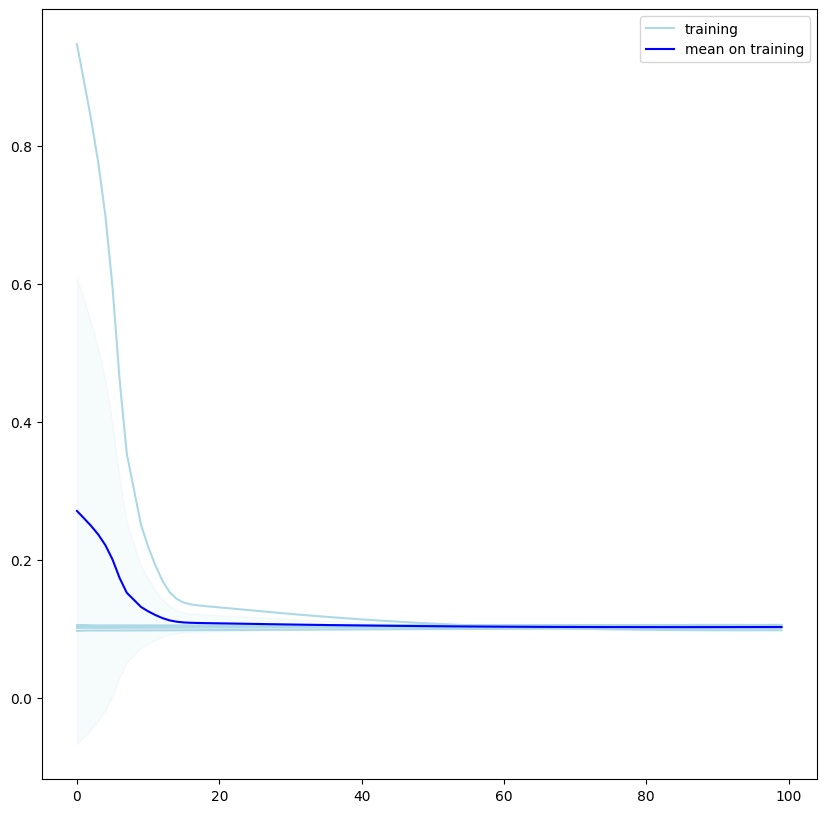

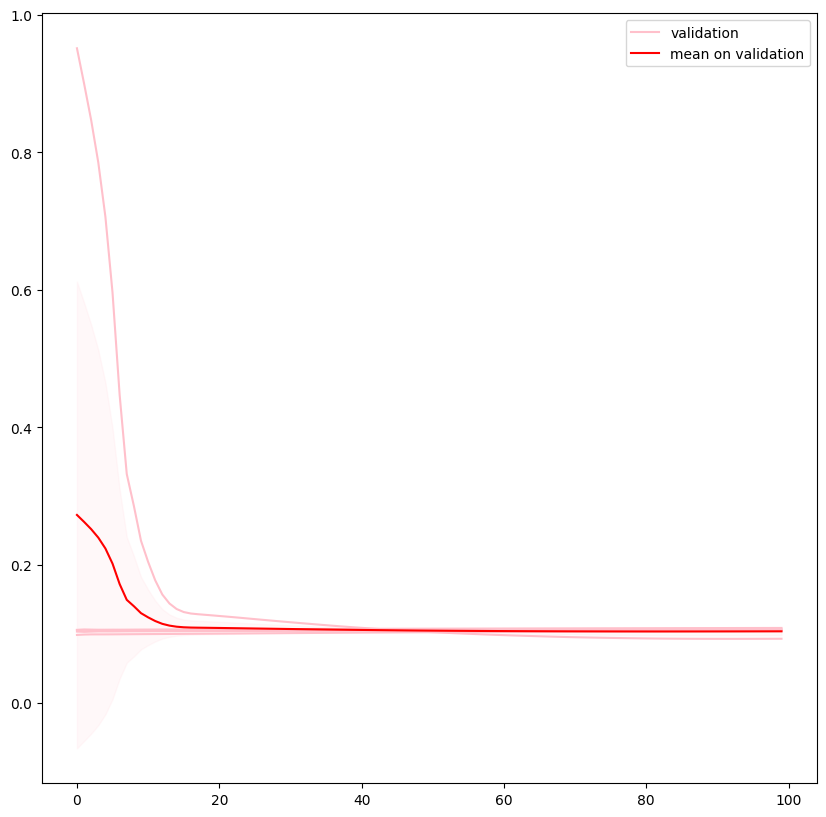

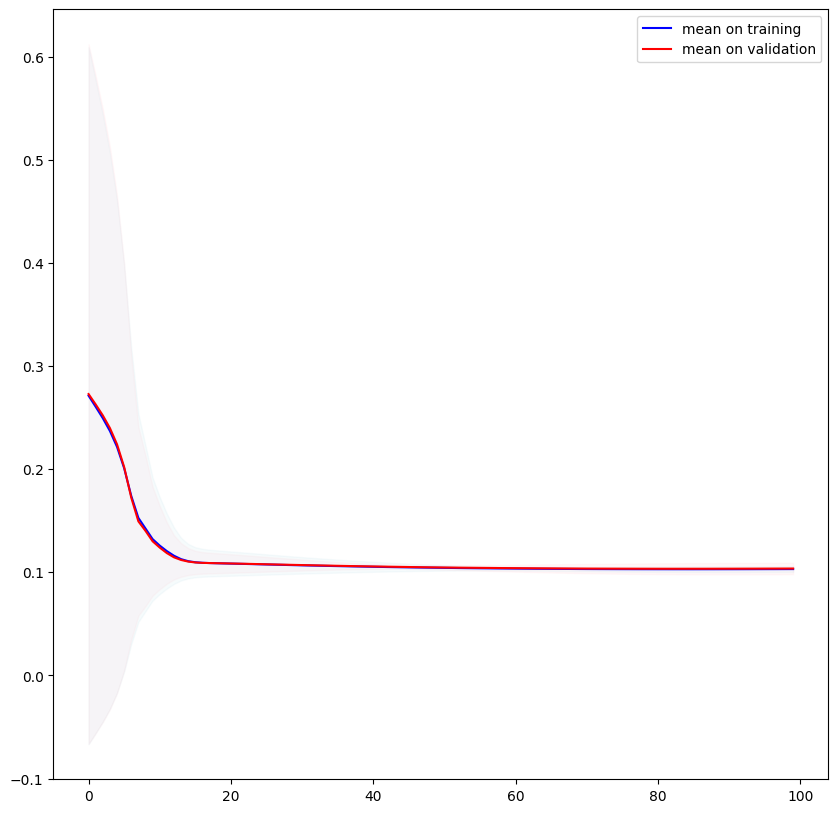

In [6]:
plt.figure(figsize=(10,10))
training_plot, mean_training_plot = plot_training(training_error_list=training_error_list)
plt.legend(handles=[training_plot, mean_training_plot])
plt.show()

plt.figure(figsize=(10,10))
validation_plot, mean_validation_plot = plot_validation(validation_error_list=validation_error_list)
plt.legend(handles=[validation_plot, mean_validation_plot])
plt.show()

plt.figure(figsize=(10,10))
plot_mean_and_std_validation(training_error_list=training_error_list,
                             validation_error_list=validation_error_list)
plt.legend()
plt.show()

In [7]:
mean_validation = np.mean(validation_error_list, axis=0)
std_validation = np.std(validation_error_list, axis=0)

print("Validation: mean_validation_error \pm std_validation_error")
print(f"{mean_validation.tolist()[0][-1]} \pm {std_validation.tolist()[0][-1]}")

Validation: mean_validation_error \pm std_validation_error
0.1036142611077121 \pm 0.0055521475652865835


In [8]:
mean_training = np.mean(training_error_list, axis=0)
std_training = np.std(training_error_list, axis=0)

print("Training: mean_Training_error \pm std_Training_error")
print(f"{mean_training.tolist()[0][-1]} \pm {std_training.tolist()[0][-1]}")

Training: mean_Training_error \pm std_Training_error
0.10306727514774217 \pm 0.0027728538846805238
